In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
plt.rc('font', family='NanumGothic') # For Windows
%matplotlib inline

In [2]:
df2023 = pd.read_excel(r'D:\vscode\lyk\학생 raw data_학생정보삭제_2023.xlsx')
df2024 = pd.read_excel(r'D:\vscode\lyk\학생 raw data_학생정보삭제_2024.xlsx')

In [3]:
display(df2023.head())
display(df2024.head())

,학교명,행정구,지역교육청,학교번호,학년,성별,문해력응시,수리력응시,문해력검사형,수리력검사형,...,다문화정책학교,다문화15%이상학교,문해력표집내혁신학교,문해력표집내다문화정책학교,문해력표집내다문화15%이상학교,수리력표집내혁신학교,수리력표집내다문화정책학교,수리력표집내다문화15%이상학교,문해력2가지이상해당,수리력2가지이상해당
0,서울면동초등학교,중랑구,동부,11111,4,1,1,1,A1,A1,...,1,0,클린표집내혁신학교,클린표집내다문화정책학교,0,클린표집내혁신학교,클린표집내다문화정책학교,0,2가지이상해당학교,2가지이상해당학교
1,서울면동초등학교,중랑구,동부,11111,4,1,1,1,A1,A1,...,1,0,클린표집내혁신학교,클린표집내다문화정책학교,0,클린표집내혁신학교,클린표집내다문화정책학교,0,2가지이상해당학교,2가지이상해당학교
2,서울면동초등학교,중랑구,동부,11111,4,1,1,1,A1,A1,...,1,0,클린표집내혁신학교,클린표집내다문화정책학교,0,클린표집내혁신학교,클린표집내다문화정책학교,0,2가지이상해당학교,2가지이상해당학교
3,서울면동초등학교,중랑구,동부,11111,4,2,1,1,A1,A1,...,1,0,클린표집내혁신학교,클린표집내다문화정책학교,0,클린표집내혁신학교,클린표집내다문화정책학교,0,2가지이상해당학교,2가지이상해당학교
4,서울면동초등학교,중랑구,동부,11111,4,2,1,1,A1,A1,...,1,0,클린표집내혁신학교,클린표집내다문화정책학교,0,클린표집내혁신학교,클린표집내다문화정책학교,0,2가지이상해당학교,2가지이상해당학교


,학교번호,학교명,학년,성별,문해력응시,수리력응시,지역교육청,행정구,문해력검사형,수리력검사형,...,수리력sub2lvl,수리력sub3lvl,수리력sub4lvl,문해력클린,수리력클린,표집여부,각종학교,학교밖센터,혁신학교,다문화
0,11112,서울동답초등학교,4,1,1,1,동부,동대문구,A,A,...,안전,안전,경계,0,0,0,0,0,1,0
1,11112,서울동답초등학교,4,2,1,1,동부,동대문구,A,A,...,경계,안전,안전,0,0,0,0,0,1,0
2,11112,서울동답초등학교,4,1,1,1,동부,동대문구,A,A,...,안전,안전,안전,0,0,0,0,0,1,0
3,11112,서울동답초등학교,4,2,1,1,동부,동대문구,A,A,...,안전,안전,안전,0,0,0,0,0,1,0
4,11112,서울동답초등학교,4,1,1,1,동부,동대문구,A,A,...,주의,경계,경계,0,0,0,0,0,1,0


In [15]:
# ===== 매핑 (원본 코드 유지) =====
# 2023 (컬럼 접두사: sm; 8학년=코드 2, 10학년=코드 1)
mapping_2023 = {
    4: {
        "수와 연산":[1,2,5,6,7,8,9,10,11,12,13,14,17,19,20],
        "도형과 측정":[16,21,22,23,24,27,30,33,34,35,36],
        "변화와 관계":[3,4,15,18,29],
        "자료와 가능성":[25,26,28,31,32,37,38],
    },
    6: {
        "수와 연산":[5,6,8,9,10,11,12,14,15,18,19,20],
        "도형과 측정":[21,26,27,30,33,34,35,36,37,38,39,40],
        "변화와 관계":[1,2,3,4,7,13,16,17],
        "자료와 가능성":[22,23,24,25,28,29,31,32],
    },
    2: {  # 8학년(중2)
        "수와 연산":[1,5,8,9,10,12,13,14,15],
        "도형과 측정":[25,26,27,28,29,30,31,32,33,34,35,36,37,44],
        "변화와 관계":[16,17,18,19,20,21,22,23,24],
        "자료와 가능성":[38,39,40,41,42,43],
    },
    1: {  # 10학년(고1)
        "수와 연산":[1,2,3,9,13,14,15,16,31],
        "도형과 측정":[27,28,29,32,33,34,39,41,42,43,44,45,46],
        "변화와 관계":[4,5,6,7,8,10,11,12,17,18,19,20,21,22,23,26],
        "자료와 가능성":[24,25,30,35,36,37,38,40],
    },
}

# 2024 (컬럼 접두사: 수리력; 8학년=8, 10학년=10)
mapping_2024 = {
    4: {
        "수와 연산":[1,2,5,6,7,8,9,10,11,12,13,14,17,19,20],
        "도형과 측정":[21,22,23,24,27,30,33,34,35,36,37],
        "변화와 관계":[3,4,15,16,18,29],
        "자료와 가능성":[25,26,28,31,32,38],
    },
    6: {
        "수와 연산":[1,2,6,8,9,10,11,12,13,14,16,19,20],
        "도형과 측정":[21,22,24,27,29,30,33,35,37,39,40],
        "변화와 관계":[3,4,5,7,15,17,18],
        "자료와 가능성":[23,25,26,28,31,32,34,36,38],
    },
    8: {
        "수와 연산":[1,2,8,9,10,12,13,14,16],
        "도형과 측정":[23,24,26,27,28,29,31,32,33,34,35,38,39],
        "변화와 관계":[3,4,5,6,7,11,15,17,18,19,20,21,22],
        "자료와 가능성":[25,30,36,37,40,41,42,43,44],
    },
    10: {
        "수와 연산":[1,2,3,4,6,7,8,9,12,13],
        "도형과 측정":[28,29,30,31,32,33,34,40,41,42,43,44,45,46],
        "변화와 관계":[5,10,11,14,15,16,17,18,19,20,21,22,23],
        "자료와 가능성":[24,25,26,27,35,36,37,38,39],
    },
}

# ===== 영역별 색상 (수정됨) =====
AREA_COLORS = {
    "어휘력": "#4C78A8",         # 파랑 (Vega)
    "탐색 및 확인": "#F58518", # 주황 (Vega)
    "통합 및 해석": "#54A24B", # 초록 (Vega)
    "평가 및 적용": "#D9C168", # 노란색
}

In [16]:
def area_scores(df, area_numbers, prefix):
    cols = [f"{prefix}{n:02d}" for n in area_numbers if f"{prefix}{n:02d}" in df.columns]
    if not cols:
        return None
    # 정답/오답(1/0)의 평균이 정답률(0~1)
    return df[cols].mean(axis=1, skipna=True).dropna()

def get_scores_df(df, grade_code, mapping, prefix):
    df_g = df[df["학년"] == grade_code]
    data = {}
    for area, nums in mapping[grade_code].items():
        s = area_scores(df_g, nums, prefix)
        if s is not None:
            data[area] = s.values
    return pd.DataFrame(data)

def plot_single_year_grade(df_scores, year, grade, outpath=None):
    labels = list(df_scores.columns)
    data = [df_scores[c].dropna().values for c in labels]

    fig, ax = plt.subplots(figsize=(8,6)) # Figure와 Axes 객체를 함께 생성
    
    # 바이올린 플롯 그리기
    v = ax.violinplot(data, showmeans=False, showmedians=True, showextrema=False)

    # 개별 바이올린 색상, 테두리 지정 
    for body, lab in zip(v['bodies'], labels):
        body.set_facecolor(AREA_COLORS.get(lab, "#777777"))
        body.set_alpha(0.7)
        # 테두리 설정
        body.set_edgecolor('black') 
        body.set_linewidth(0.8)

    # 내부 박스(이상치 숨김)
    # 중앙값(median) 표시를 위해 박스 플롯을 겹쳐 사용
    ax.boxplot(data, widths=0.1, showfliers=False, medianprops=dict(color="black"))

    # Q1, Q2, Q3 수치 표시 (추가됨)
    for i, d in enumerate(data):
        q1, median, q3 = np.percentile(d, [25, 50, 75])
        x = i + 1 # 바이올린의 x 위치 (1부터 시작)
        
        # 텍스트 오프셋 설정 
        offset_y_q1 = 0.03
        offset_y_q2 = 0.03
        offset_y_q3 = 0.03
        offset_x_text = 0.15

        # Q1 (25th percentile) 표시
        ax.text(x + offset_x_text, q1 - offset_y_q1, f"Q1={q1:.2f}",
                color='blue', va='center', ha='left', fontsize=9)
        # Q2 (Median, 50th percentile) 표시
        ax.text(x + offset_x_text, median - offset_y_q2, f"Q2={median:.2f}",
                color='red', va='center', ha='left', fontsize=9)
        # Q3 (75th percentile) 표시
        ax.text(x + offset_x_text, q3 + offset_y_q3, f"Q3={q3:.2f}",
                color='green', va='center', ha='left', fontsize=9)

    # Axes 꾸미기
    ax.set_xticks(np.arange(1, len(labels)+1), labels, rotation=10)
    ax.set_ylabel("정답률")
    ax.set_ylim(0, 1.05)
    
    # 제목 형식 변경
    ax.set_title(f"{year}학년도 문해력 영역별 정답률 분포 ({grade}학년)")
    
    # 플롯 주변 테두리 제거 
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
    # y축 그리드 추가 및 바이올린 뒤로 배치
    ax.grid(True, linestyle='--', alpha=0.6, axis='y')
    ax.set_axisbelow(True)

    plt.tight_layout()
    # plt.savefig(outpath, dpi=220)
    plt.show()
    plt.close()

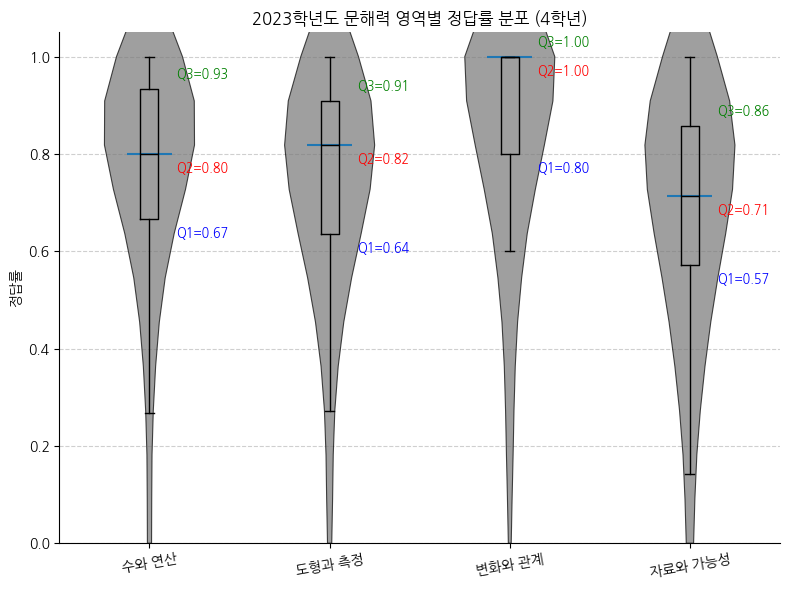

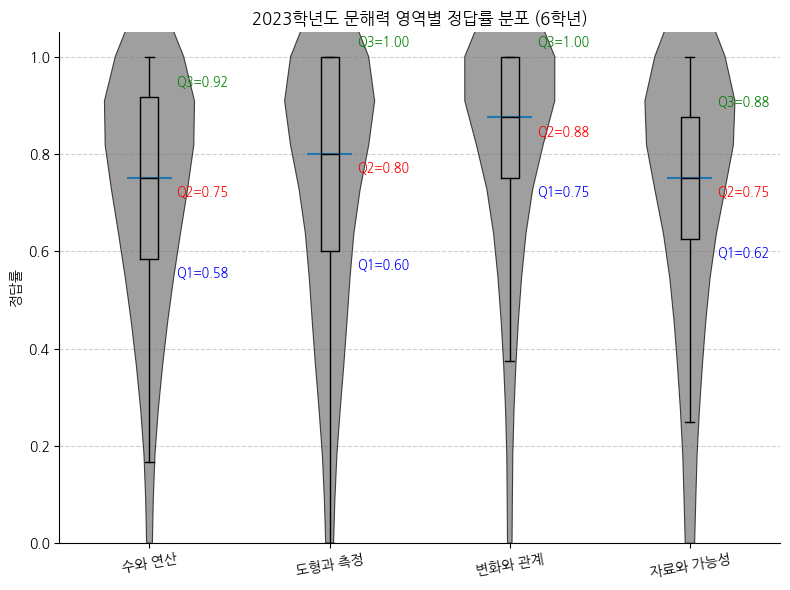

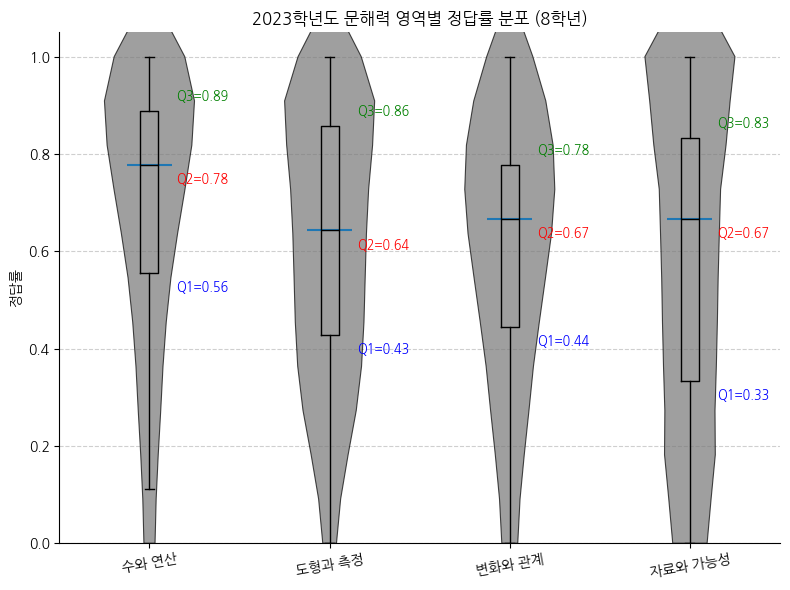

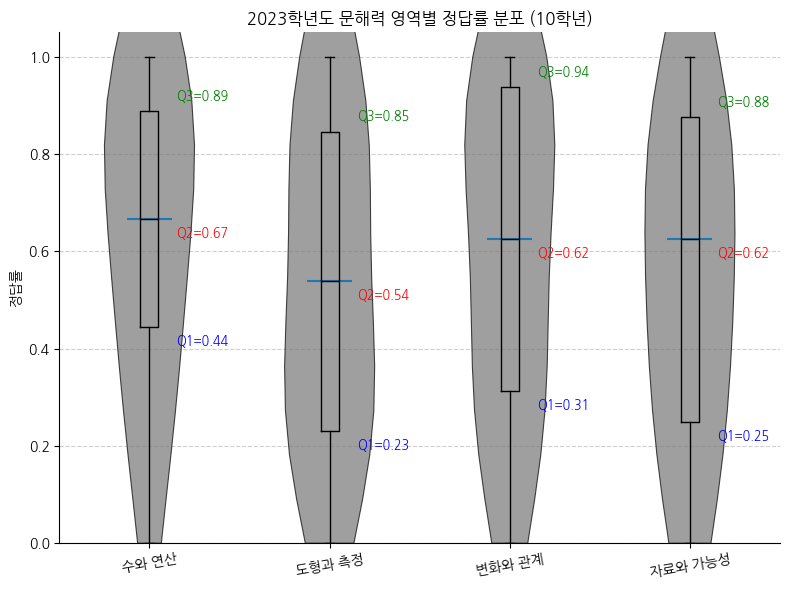

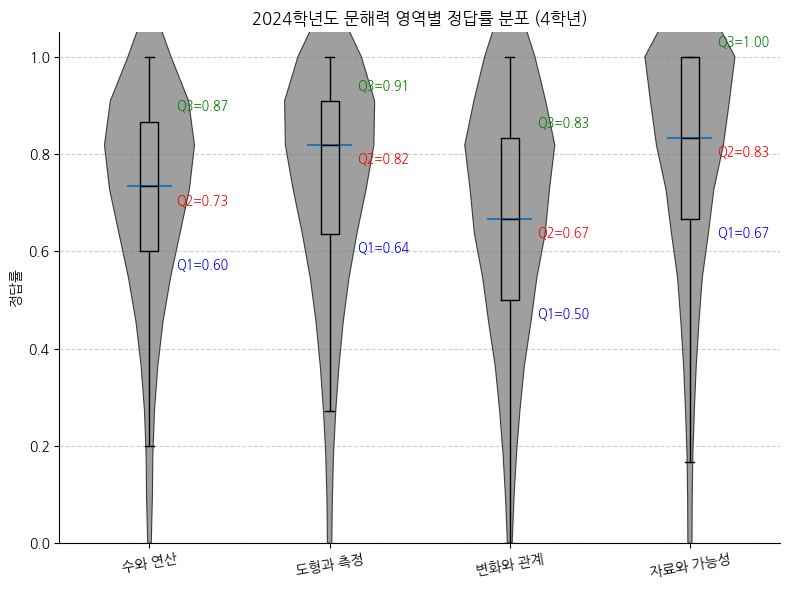

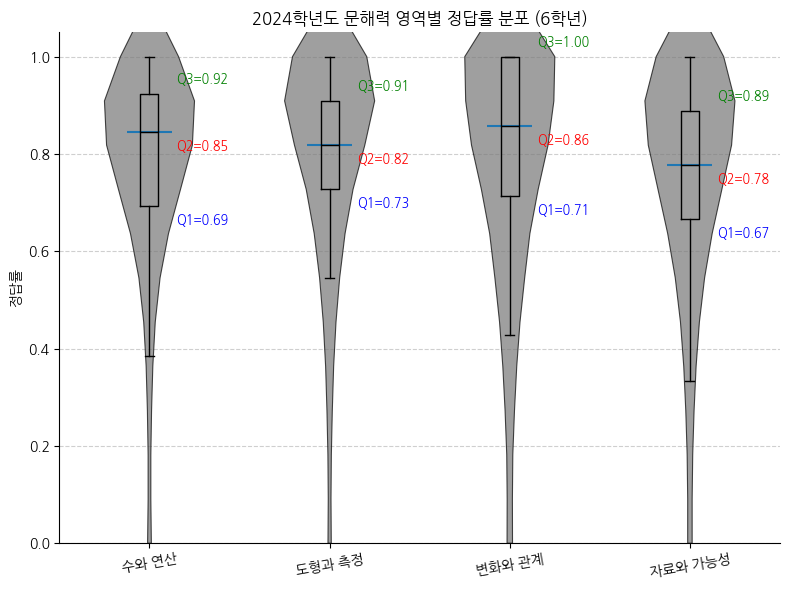

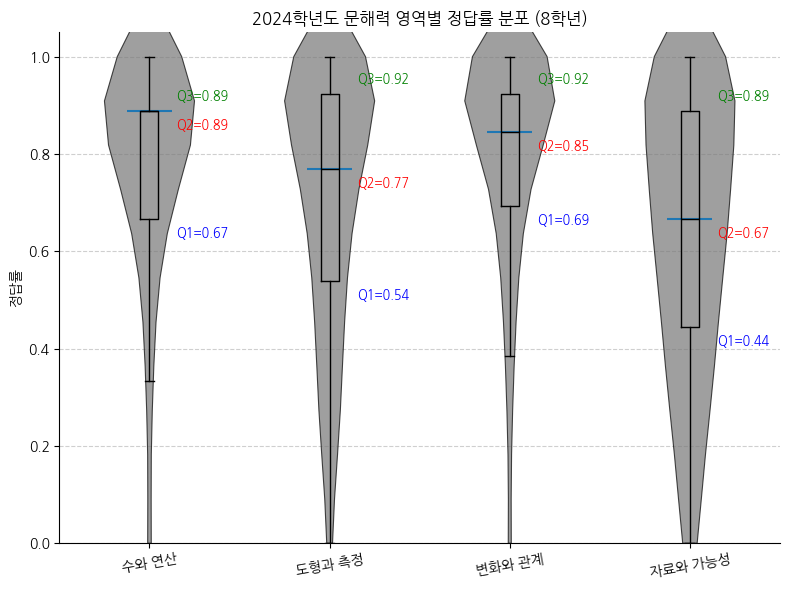

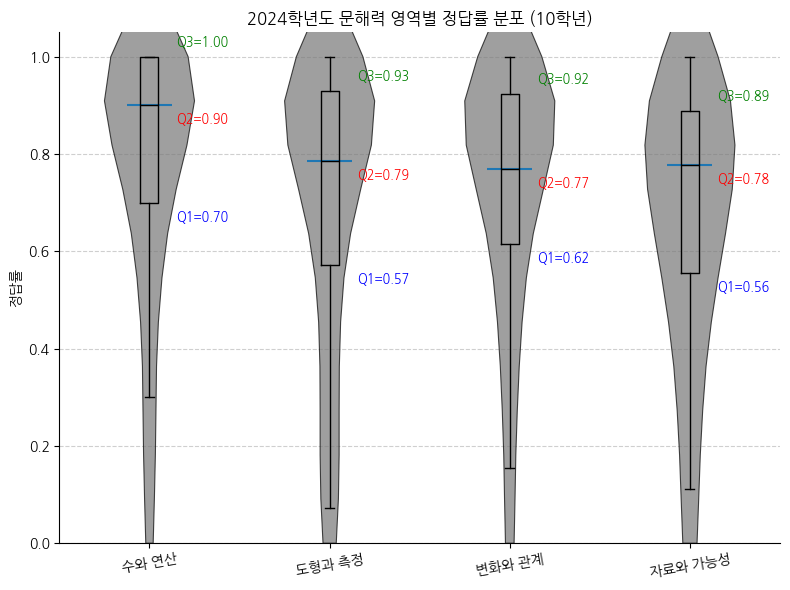

In [17]:
df23 = df2023.__deepcopy__()
df24 = df2024.__deepcopy__()

def main():

    # 2023: 학년 코드 주의(8→2, 10→1)
    jobs_2023 = [(2023, 4, 4), (2023, 6, 6), (2023, 8, 2), (2023, 10, 1)]
    for year, disp_grade, code in jobs_2023:
        scores = get_scores_df(df23, code, mapping_2023, prefix="sm")
        # out = BASE / f"violin_{year}_{disp_grade}th.png"
        plot_single_year_grade(scores, year, disp_grade)

    # 2024: 학년 코드 그대로(8, 10)
    jobs_2024 = [(2024, 4, 4), (2024, 6, 6), (2024, 8, 8), (2024, 10, 10)]
    for year, disp_grade, code in jobs_2024:
        scores = get_scores_df(df24, code, mapping_2024, prefix="문해력")
        # out = BASE / f"violin_{year}_{disp_grade}th.png"
        plot_single_year_grade(scores, year, disp_grade)

    # print("완료! violin_2023_4th/6th/8th/10th.png, violin_2024_4th/6th/8th/10th.png 생성됨.")

if __name__ == "__main__":
    main()